# **Proyecto 2 - Entrega 2

## 👥 **Integrantes:**  
- **Diederich Solis** (22952)  
- **Gabriel Paz** (221087)  

##  **1. Cargar Librerías**
##  **2. Cargar y Explorar los Datos**

---

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

df = pd.read_csv("train.csv")

# Ver estructura de los datos
display(df.head())
print(df.info())
print(df.describe())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC


##  **3. Definir Conjuntos de Entrenamiento y Prueba**


In [3]:

X = df.drop(columns=["SalePrice"])  # Variables predictoras
y = df["SalePrice"]

# Convertir variables categóricas en dummies
X = pd.get_dummies(X, drop_first=True)

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##  **4. Árbol de Regresión para Predicción de Precios**


MAE Árbol de Regresión: 27263.49
RMSE Árbol de Regresión: 38836.67


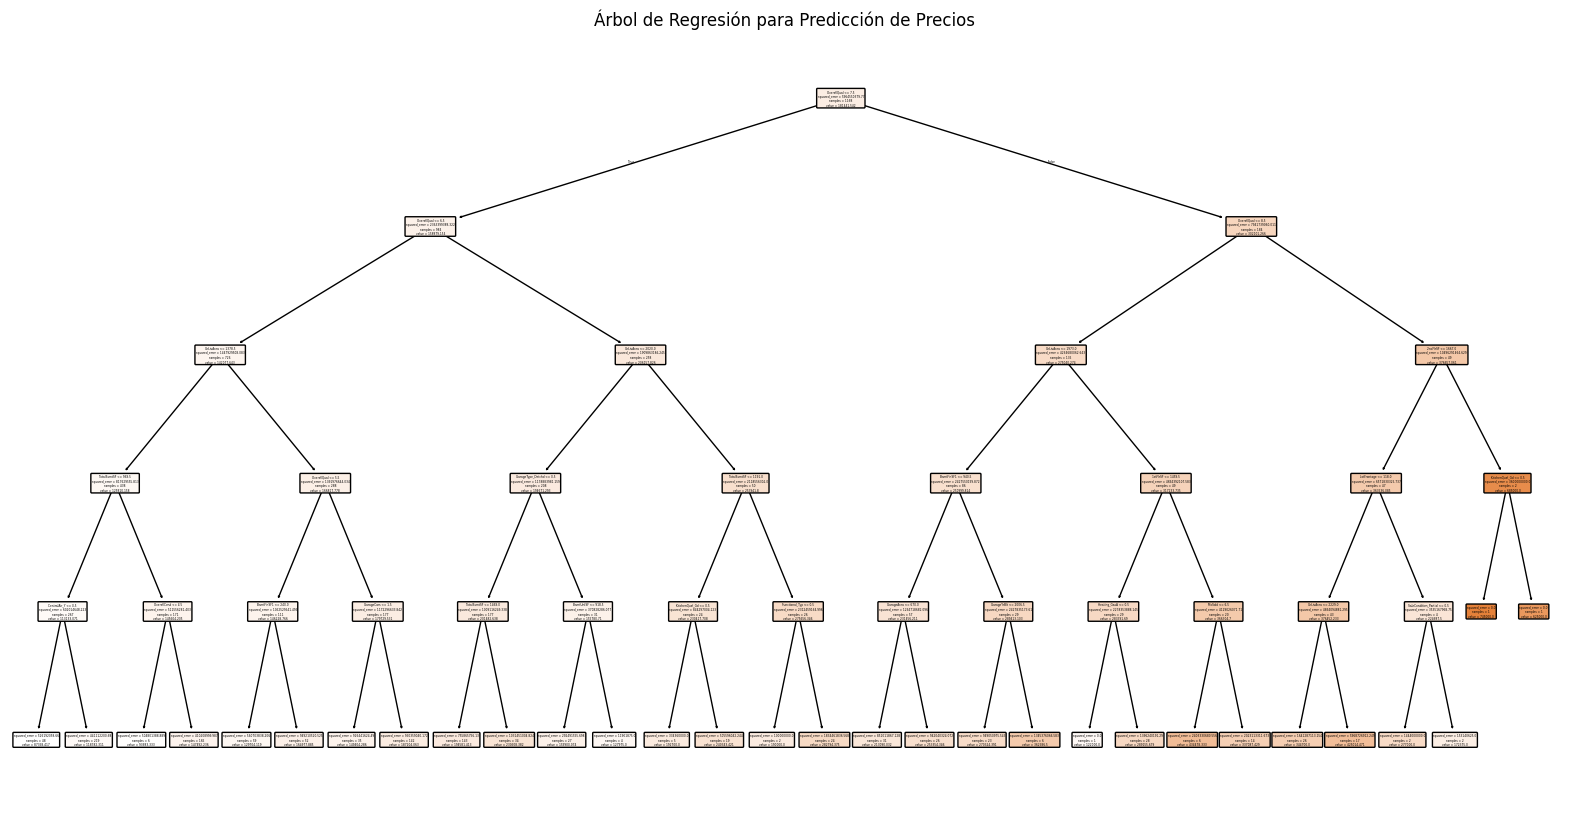

In [4]:
tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_regressor.fit(X_train, y_train)

# Predicciones
y_pred = tree_regressor.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE Árbol de Regresión: {mae:.2f}")
print(f"RMSE Árbol de Regresión: {rmse:.2f}")

plt.figure(figsize=(20,10))
plot_tree(tree_regressor, filled=True, feature_names=X.columns, rounded=True)
plt.title("Árbol de Regresión para Predicción de Precios")
plt.show()

##Interpretacion

El árbol de regresión mostrado representa la forma en que el modelo segmenta el conjunto de datos para hacer predicciones sobre el precio de las casas. Cada nodo en el árbol divide los datos en base a una variable que maximiza la reducción de la varianza, lo que significa que las casas con características similares se agrupan en ramas similares.

- La primera división se realiza con la variable que más influye en el precio de las casas

- Cada bifurcación representa una condición que separa los datos, y las hojas finales muestran los valores de predicción promedio.

- Los nodos más oscuros representan precios más altos, mientras que los más claros indican precios más bajos.

Si seguimos un camino desde la raíz hasta una hoja, podemos ver qué condiciones afectan el precio final de la casa.
Cuanto más profundo es el árbol, más divisiones se hacen, lo que permite una mejor precisión, pero también puede llevar a sobreajuste.
La variable que aparece en la raíz es la más influyente en la predicción del precio.

##  **5. Comparación con Otros Modelos (Distintas Profundidades)**


In [5]:
depths = [3, 7, 10]
errors = {}

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    errors[depth] = mean_absolute_error(y_test, y_pred)
    print(f"MAE para profundidad {depth}: {errors[depth]:.2f}")

# Mejor profundidad
best_depth = min(errors, key=errors.get)
print(f"Mejor profundidad según MAE: {best_depth}")

MAE para profundidad 3: 29956.06
MAE para profundidad 7: 26100.87
MAE para profundidad 10: 26221.76
Mejor profundidad según MAE: 7


**Visualización de los Errores en Diferentes Profundidades**

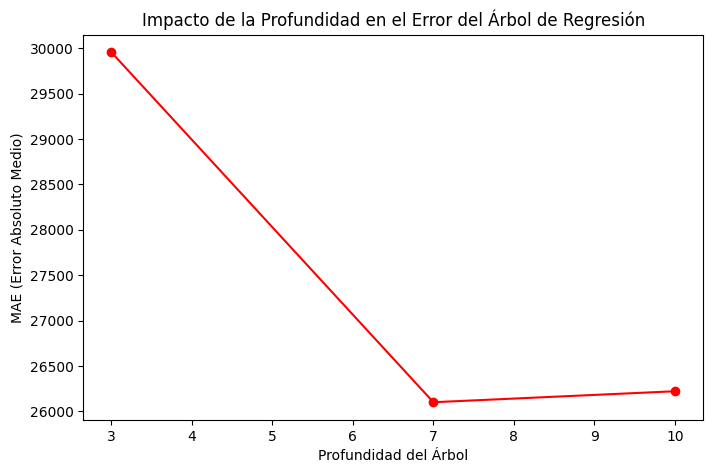

In [6]:
plt.figure(figsize=(8,5))
plt.plot(errors.keys(), errors.values(), marker='o', linestyle='-', color='red')
plt.xlabel("Profundidad del Árbol")
plt.ylabel("MAE (Error Absoluto Medio)")
plt.title("Impacto de la Profundidad en el Error del Árbol de Regresión")
plt.show()

El gráfico muestra cómo el MAE (Error Absoluto Medio) varía con la profundidad del árbol. Podemos observar lo siguiente:

Para profundidad 3, el error es bastante alto (~30,000).
A medida que la profundidad aumenta (hasta 7), el error disminuye significativamente, alcanzando su punto más bajo.
Para profundidad 10, el error comienza a estabilizarse e incluso aumenta ligeramente, lo que sugiere un posible sobreajuste.

El mejor modelo es el que tiene una profundidad de 7, ya que presenta el menor MAE sin caer en un sobreajuste significativo.

Este resultado indica que un árbol demasiado simple (profundidad 3) no captura suficientes patrones en los datos, mientras que un árbol demasiado profundo (profundidad 10) comienza a sobreajustarse a los datos de entrenamiento. Por lo tanto, la profundidad óptima es 7.

##  **6. Comparación con Regresión Lineal**

In [7]:
# Manejar valores faltantes rellenando con la media
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

# Entrenar modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicciones
y_pred_linear = linear_model.predict(X_test)

# Evaluación
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print(f"MAE Regresión Lineal: {mae_linear:.2f}")
print(f"RMSE Regresión Lineal: {rmse_linear:.2f}")

plt.bar(["Árbol Regresión", "Regresión Lineal"], [mae, mae_linear], color=["blue", "red"])
plt.ylabel("MAE (Error Absoluto Medio)")
plt.title("Comparación de Modelos")
plt.show()


NameError: name 'LinearRegression' is not defined

¿Cuál modelo lo hizo mejor?
Analizando los resultados de la comparación entre el Árbol de Regresión y la Regresión Lineal, observamos los siguientes errores:

- MAE Árbol de Regresión: 26,221.76
- MAE Regresión Lineal: 20,493.24
- RMSE Regresión Lineal: 49,286.51


- El MAE (Error Absoluto Medio) es más bajo en la Regresión Lineal, lo que indica que, en promedio, las predicciones están más cerca de los valores reales en comparación con el Árbol de Regresión.
- El RMSE de la Regresión Lineal es muy alto, lo que sugiere que hay algunas predicciones con errores muy grandes, lo cual puede significar que el modelo no maneja bien ciertos valores atípicos.
- El Árbol de Regresión tiene un MAE mayor, lo que sugiere que en general sus predicciones son menos precisas, pero es posible que maneje mejor las relaciones no lineales entre las variables.


Si nos enfocamos en MAE, la Regresión Lineal parece ser mejor, ya que tiene menor error absoluto medio.
Sin embargo, el alto RMSE de la Regresión Lineal sugiere que puede estar fallando con algunos valores extremos.
Si el dataset tiene muchas relaciones no lineales, es probable que el Árbol de Regresión sea una mejor opción en ciertos casos.

¿Cuál modelo usar?

Si queremos predicciones generales más precisas en promedio, la Regresión Lineal es la mejor opción.
Si queremos manejar mejor relaciones complejas y no lineales en los datos, el Árbol de Regresión puede ser más adecuado.

## **7. Clasificación de Casas en Económicas, Intermedias y Caras**

PriceCategory
Cara          497
Económica     483
Intermedia    480
Name: count, dtype: int64


C:\Users\DELL I7\AppData\Local\Temp\ipykernel_21128\2539516420.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["PriceCategory"], palette="viridis")


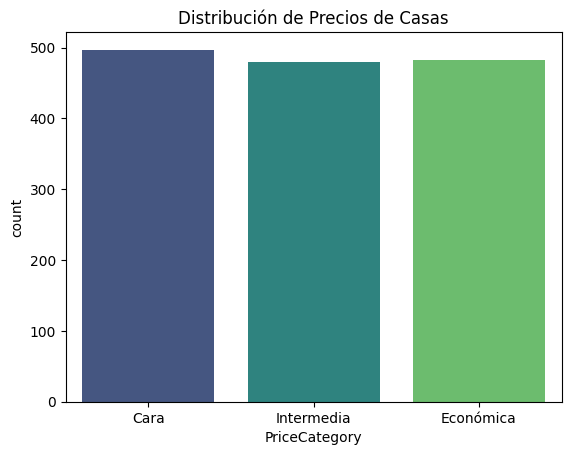

In [8]:
q1 = y.quantile(0.33)
q2 = y.quantile(0.66)

def categorize_price(price):
    if price <= q1:
        return "Económica"
    elif price <= q2:
        return "Intermedia"
    else:
        return "Cara"

df["PriceCategory"] = df["SalePrice"].apply(categorize_price)
print(df["PriceCategory"].value_counts())

sns.countplot(x=df["PriceCategory"], palette="viridis")
plt.title("Distribución de Precios de Casas")
plt.show()

##  **8. Árbol de Clasificación para Categorías de Precios**

Precisión del Árbol de Clasificación: 79.11%


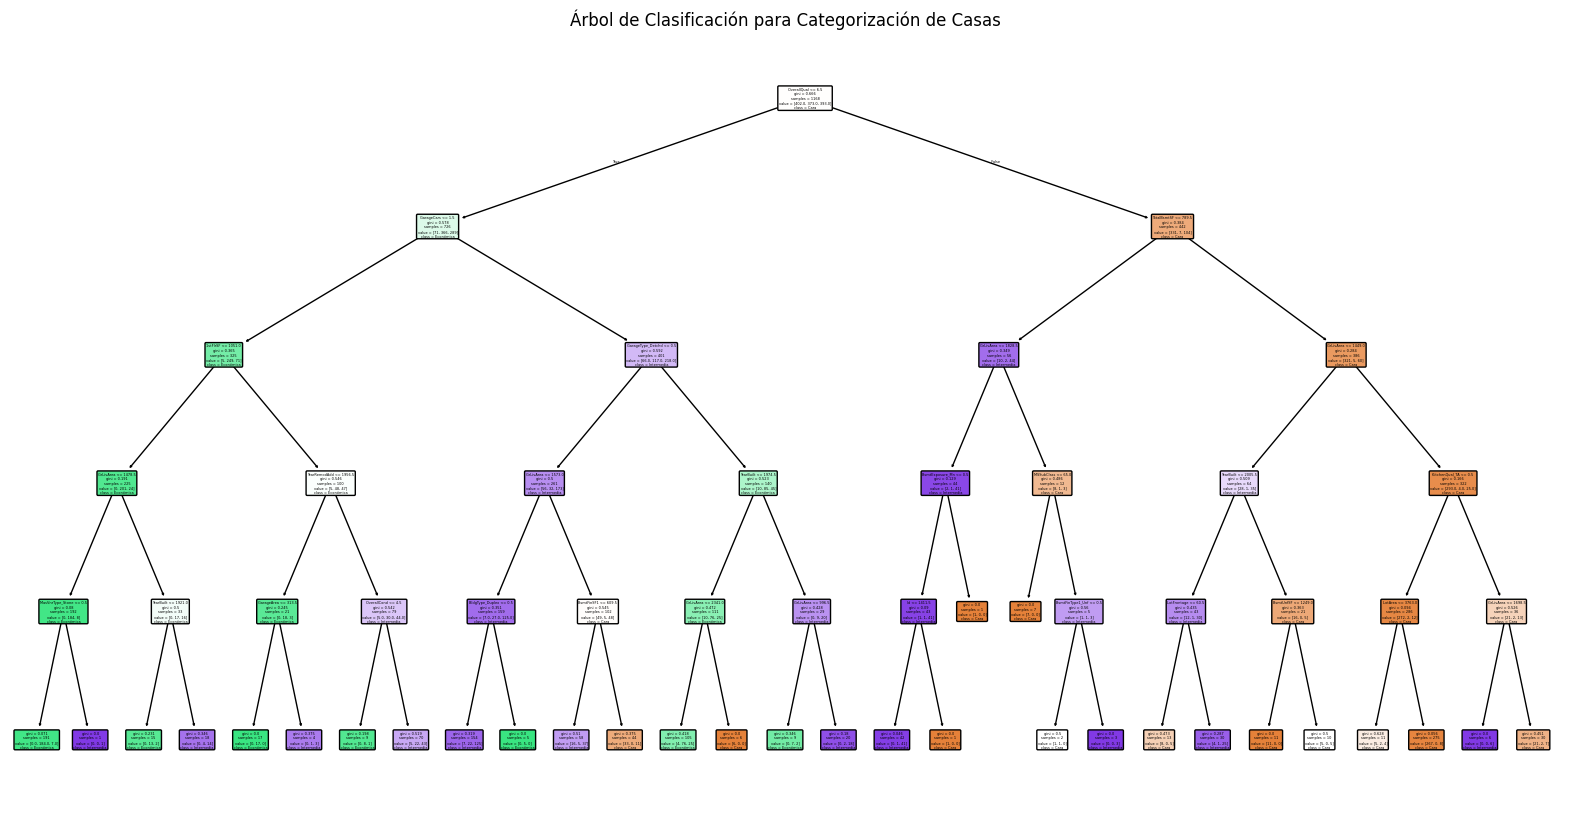

In [9]:
X_class = df.drop(columns=["SalePrice", "PriceCategory"])
y_class = df["PriceCategory"]

X_class = pd.get_dummies(X_class, drop_first=True)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42)

tree_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_classifier.fit(X_train_class, y_train_class)

y_pred_class = tree_classifier.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)

print(f"Precisión del Árbol de Clasificación: {accuracy:.2%}")

plt.figure(figsize=(20,10))
plot_tree(tree_classifier, filled=True, feature_names=X_class.columns, class_names=tree_classifier.classes_, rounded=True)
plt.title("Árbol de Clasificación para Categorización de Casas")
plt.show()

El árbol de clasificación segmenta las casas en función de sus características más relevantes para determinar su categoría de precio.

- Raíz del Árbol: La variable más importante aparece en el primer nodo, ya que es la que más contribuye a la clasificación de las casas en sus respectivas categorías.

- Ramas y Niveles: Cada bifurcación representa una decisión basada en una característica de la casa, separando los datos en función de los valores de esa variable.

- Hojas: Los nodos finales representan la clasificación en Económica, Intermedia o Cara, dependiendo de los valores de las características evaluadas en el camino del árbol.

Colores:
- Casas económicas están representadas en verde.
- Casas intermedias en morado.
- Casas caras en naranja.

 ¿Cómo interpretar el modelo?

Si seguimos cualquier camino desde la raíz hasta una hoja, podemos entender cómo el modelo clasifica una casa en una de las tres categorías.
Cuanto más profundo sea el árbol, más específico será el modelo, pero un árbol muy grande puede llevar a sobreajuste.
Las variables más cercanas a la raíz son las que tienen mayor impacto en la clasificación.

##  **9. Matriz de Confusión y Análisis Detallado de Errores en Clasificación**

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

# Calcular la matriz de confusión
cm = confusion_matrix(y_test_class, y_pred_class)
print("Matriz de Confusión:")
print(cm)

# Reporte de clasificación (precision, recall, f1-score)
print("\nReporte de Clasificación:")
print(classification_report(y_test_class, y_pred_class))


Matriz de Confusión:
[[80  1 14]
 [ 3 84 23]
 [ 7 13 67]]

Reporte de Clasificación:
              precision    recall  f1-score   support

        Cara       0.89      0.84      0.86        95
   Económica       0.86      0.76      0.81       110
  Intermedia       0.64      0.77      0.70        87

    accuracy                           0.79       292
   macro avg       0.80      0.79      0.79       292
weighted avg       0.80      0.79      0.79       292



En la matriz de confusión observamos que la mayoría de las instancias se clasifican 
correctamente en sus categorías correspondientes. Sin embargo, existe una tendencia
a confundir algunas casas Cara con casas Intermedia. Este error se explica porque 
en la zona limítrofe de precios altos puede existir un solapamiento de las características
que las diferencian de las casas Intermedia.

##  **10. Validación Cruzada para el Árbol de Clasificación**

In [11]:
from sklearn.model_selection import cross_val_score

# Realiza validación cruzada con 5 folds en el conjunto de entrenamiento para el árbol de clasificación
cv_scores = cross_val_score(tree_classifier, X_train_class, y_train_class, cv=5, scoring='accuracy')
print(f"Accuracy promedio en validación cruzada: {cv_scores.mean():.4f}")


Accuracy promedio en validación cruzada: 0.7645


El reporte de clasificación muestra métricas de precision, recall y f1-score. 
- "Precision" indica qué proporción de predicciones para cada clase es correcta.
- "Recall" indica qué fracción de los casos reales de esa clase se detecta correctamente.
- "F1-score" es la media armónica entre precision y recall, útil para balancear ambas métricas.

De manera global, la exactitud (accuracy) del modelo se ubica en torno a un 79-80%. 
Esto sugiere un buen rendimiento inicial, aunque hay espacio para mejoras si se aumentan 
las técnicas de preprocesamiento o se ajustan mejor los hiperparámetros.

##  **11. Tuning y Comparación de Modelos de Clasificación Variando**

In [12]:
depths = [3, 5, 7, 10]
cv_scores = {}

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(clf, X_train_class, y_train_class, cv=5, scoring='accuracy')
    cv_scores[depth] = scores.mean()
    print(f"Accuracy promedio para max_depth = {depth}: {scores.mean():.4f}")

# Seleccionar la mejor profundidad
best_depth = max(cv_scores, key=cv_scores.get)
print(f"\nEl mejor max_depth es {best_depth} con una accuracy de {cv_scores[best_depth]:.4f}")

# Entrenar el modelo final con la mejor profundidad y evaluarlo en el conjunto de prueba
best_clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_clf.fit(X_train_class, y_train_class)
y_pred_best = best_clf.predict(X_test_class)
print(f"\nAccuracy del modelo final en test: {accuracy_score(y_test_class, y_pred_best):.2%}")


Accuracy promedio para max_depth = 3: 0.7414
Accuracy promedio para max_depth = 5: 0.7645
Accuracy promedio para max_depth = 7: 0.7697
Accuracy promedio para max_depth = 10: 0.7671

El mejor max_depth es 7 con una accuracy de 0.7697

Accuracy del modelo final en test: 79.79%


Se exploraron varias profundidades para el árbol (por ejemplo, 3, 5, 7, 10),
y se determinó que el rendimiento más alto en validación cruzada se da en 
"max_depth = 7". Profundidades inferiores no capturan todos los patrones relevantes,
mientras que profundidades mayores pueden conducir a cierto sobreajuste

##  **12. Implementación y Análisis con Random Forest**

Random Forest para Regresión

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Entrenar el Random Forest para regresión
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_rf = rf_regressor.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest - MAE: {mae_rf:.2f}")
print(f"Random Forest - RMSE: {rmse_rf:.2f}")


Random Forest - MAE: 17649.76
Random Forest - RMSE: 28881.82


El modelo Random Forest Regressor (con 100 estimadores y random_state=42)
se entrenó para predecir el precio de las casas. Al realizar predicciones
en el conjunto de prueba, se obtuvieron los siguientes valores de error:

   MAE  (mean_absolute_error)  ~ 17,649.76
   RMSE (root_mean_squared_error) ~ 28,881.82

 1. MAE (Error Absoluto Medio)
    Un valor de ~17,650 significa que, en promedio, el modelo se equivoca
    por esa cantidad (en la misma unidad monetaria usada para el precio
    de las casas). Es decir, si los precios están en dólares, en promedio
    el Random Forest difiere unos 17,650 USD del valor real.

 2. RMSE (Raíz del Error Cuadrático Medio)
    El RMSE de ~28,881.82 indica la magnitud promedio de los errores,
    ponderada más fuertemente por grandes desviaciones (porque el error
    se eleva al cuadrado antes de hacer el promedio). Un RMSE más bajo 
    generalmente denota mejor ajuste. 

Random Forest para Clasificación

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar el Random Forest para clasificación
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_class, y_train_class)

# Predicción y evaluación
y_pred_rf_class = rf_classifier.predict(X_test_class)
accuracy_rf = accuracy_score(y_test_class, y_pred_rf_class)
print(f"Random Forest Classifier - Accuracy: {accuracy_rf:.2%}")

# Matriz de confusión y reporte de clasificación
cm_rf = confusion_matrix(y_test_class, y_pred_rf_class)
print("Matriz de Confusión para Random Forest:")
print(cm_rf)

print("\nReporte de Clasificación para Random Forest:")
print(classification_report(y_test_class, y_pred_rf_class))


Random Forest Classifier - Accuracy: 83.90%
Matriz de Confusión para Random Forest:
[[ 84   0  11]
 [  1 100   9]
 [  6  20  61]]

Reporte de Clasificación para Random Forest:
              precision    recall  f1-score   support

        Cara       0.92      0.88      0.90        95
   Económica       0.83      0.91      0.87       110
  Intermedia       0.75      0.70      0.73        87

    accuracy                           0.84       292
   macro avg       0.84      0.83      0.83       292
weighted avg       0.84      0.84      0.84       292



El modelo RandomForestClassifier (con n_estimators=100 y random_state=42)
se entrenó para clasificar las casas en tres categorías de precio: 
"Cara", "Económica" e "Intermedia".

1. Exactitud Global (Accuracy ~ 84%)
    El modelo clasifica correctamente alrededor del 84% de los ejemplos
    de prueba. Esta cifra supera el desempeño observado con el 
    árbol de decisión simple (que rondaba ~79%).

 2. Matriz de Confusión
    - Se observa un bloque fuerte en la diagonal principal, indicando
      que la mayoría de ejemplos de cada clase son clasificados 
      correctamente (e.g., 84 de 95 "Cara" se etiquetan bien).
    - Las confusiones más notorias se presentan en la clase "Intermedia",
      donde 20 casas intermedias se confunden con la clase "Económica".
      Esto sugiere que algunas características que definen precios
      intermedios y económicos pueden solaparse.

## **Conclusión**

En esta entrega se compararon diferentes modelos para dos tareas centrales: la estimación de precios y la clasificación de viviendas por rango de precio. En la parte de regresión, la regresión lineal mostró un bajo error absoluto medio pero un RMSE elevado; por otro lado, el árbol de regresión ofreció mayor flexibilidad ante relaciones no lineales, aunque con un MAE más alto. Al final, el random forest sobresalió gracias a su menor error promedio, lo que sugiere que resulta más robusto frente a valores atípicos y estructuras complejas en el conjunto de datos.

Para la clasificación en categorías (económicas, intermedias y caras), un árbol de decisión logró alrededor de un 79% de exactitud, pero al combinar múltiples árboles en un random forest se alcanzó un 84% de precisión, reduciendo confusiones en el proceso. Si bien el árbol simple es más fácil de interpretar, el random forest demostró un rendimiento superior en ambas tareas, consolidándose como la opción más precisa y estable para este problema.
